### 导包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### 加载数据

In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

[1]


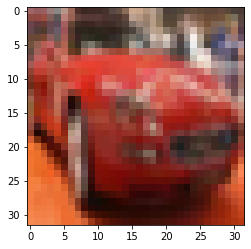

In [6]:
plt.imshow(X_train[5])
print(y_train[5, :])

In [7]:
# |   0   | airplane    |
# |   1   | automobile  |
# |   2   | bird        |
# |   3   | cat         |
# |   4   | deer        |
# |   5   | dog         |
# |   6   | frog        |
# |   7   | horse       |
# |   8   | ship        |
# |   9   | truck       |

### 数据处理

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
X_train.flatten().shape

(153600000,)

In [10]:
s = StandardScaler()
X_train_scaled = s.fit_transform(X_train.reshape(-1, 1).astype('f4')).reshape(-1, 32, 32, 3)
X_test_scaled = s.transform(X_test.reshape(-1, 1).astype('f4')).reshape(-1, 32, 32, 3)

In [11]:
X_train_scaled.shape

(50000, 32, 32, 3)

### model

In [12]:
from keras.layers import Flatten, Dense, AlphaDropout

In [13]:
model = keras.models.Sequential()
model.add(Flatten(input_shape = X_train_scaled.shape[1:]))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 830,250
Trainable params: 830,250
Non-trai

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='acc')

In [15]:
history = model.fit(X_train_scaled, y_train, 
                    batch_size= 32,
                    epochs= 20,
                    validation_data=(X_test_scaled, y_test) )

Epoch 1/20
1563/1563 [==============================] - 11s 6ms/step - loss: 1.7596 - acc: 0.3781 - val_loss: 1.5752 - val_acc: 0.4432
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5383 - acc: 0.4549 - val_loss: 1.4860 - val_acc: 0.4768
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4376 - acc: 0.4942 - val_loss: 1.4540 - val_acc: 0.4910
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3555 - acc: 0.5210 - val_loss: 1.4470 - val_acc: 0.4882
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2899 - acc: 0.5440 - val_loss: 1.4257 - val_acc: 0.5030
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2320 - acc: 0.5636 - val_loss: 1.4010 - val_acc: 0.5170
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1761 - acc: 0.5846 - val_loss: 1.3983 - val_acc: 0.5185
Epoch 8/20
1563/1563 [==============================] - 9s 

<AxesSubplot:>

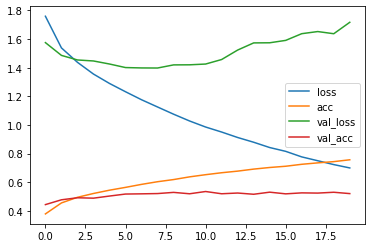

In [16]:
pd.DataFrame(history.history).plot()

#### 解决过拟合

In [17]:
model = keras.models.Sequential()
model.add(Flatten(input_shape = X_train_scaled.shape[1:]))
model.add(Dense(256, activation = 'relu'))
model.add(AlphaDropout(0.4))
model.add(Dense(128, activation = 'relu'))
model.add(AlphaDropout(0.3))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 256)               786688    
                                                                 
 alpha_dropout (AlphaDropout  (None, 256)              0         
 )                                                               
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 alpha_dropout_1 (AlphaDropo  (None, 128)              0         
 ut)                                                             
                                                                 
 dense_7 (Dense)             (None, 64)               

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='acc')

In [19]:
history = model.fit(X_train_scaled, y_train, 
                    batch_size= 32,
                    epochs= 20,
                    validation_data=(X_test_scaled, y_test) )

Epoch 1/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9629 - acc: 0.2829 - val_loss: 2.1271 - val_acc: 0.3882
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7639 - acc: 0.3684 - val_loss: 2.1321 - val_acc: 0.4202
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6881 - acc: 0.3980 - val_loss: 1.9666 - val_acc: 0.4483
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6354 - acc: 0.4160 - val_loss: 1.9148 - val_acc: 0.4553
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5959 - acc: 0.4332 - val_loss: 1.9061 - val_acc: 0.4687
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5651 - acc: 0.4448 - val_loss: 1.9512 - val_acc: 0.4721
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5342 - acc: 0.4561 - val_loss: 1.9429 - val_acc: 0.4774
Epoch 8/20
1563/1563 [==============================] - 

<AxesSubplot:>

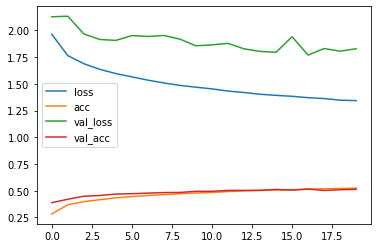

In [20]:
pd.DataFrame(history.history).plot()